# Different Regression models to predict the housing prices

### Importing Libraries 

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, preprocessing, model_selection
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
#Importing train and test datasets

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [45]:
#Drop the column ID from train and test

train = train.drop(['Id'],axis = 1)
train.head()
test = test.drop(['Id'],axis = 1)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
a = train.head()
a

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
a * 2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RLRL,130.0,16900,PavePave,NaN,RegReg,LvlLvl,AllPubAllPub,InsideInside,...,0,NaN,NaN,NaN,0,4,4016,WDWD,NormalNormal,417000
1,40,RLRL,160.0,19200,PavePave,NaN,RegReg,LvlLvl,AllPubAllPub,FR2FR2,...,0,NaN,NaN,NaN,0,10,4014,WDWD,NormalNormal,363000
2,120,RLRL,136.0,22500,PavePave,NaN,IR1IR1,LvlLvl,AllPubAllPub,InsideInside,...,0,NaN,NaN,NaN,0,18,4016,WDWD,NormalNormal,447000
3,140,RLRL,120.0,19100,PavePave,NaN,IR1IR1,LvlLvl,AllPubAllPub,CornerCorner,...,0,NaN,NaN,NaN,0,4,4012,WDWD,AbnormlAbnorml,280000
4,120,RLRL,168.0,28520,PavePave,NaN,IR1IR1,LvlLvl,AllPubAllPub,FR2FR2,...,0,NaN,NaN,NaN,0,24,4016,WDWD,NormalNormal,500000


In [4]:
#Checking the variance of each columns
DF = pd.DataFrame(train.var())
DF.head()

,0
MSSubClass,1.789338e+03
LotFrontage,5.897492e+02
LotArea,9.962565e+07
OverallQual,1.912679e+00
OverallCond,1.238322e+00


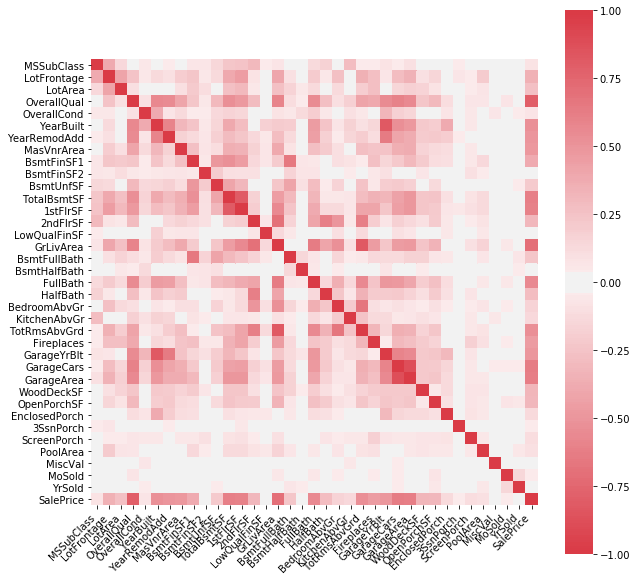

In [5]:
#Correlation heatmap

corr = train.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 10, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Feature Selection: 

Find the correlation between  independent variables and response variable. Consider only those varaibles for which the correlation is greater than 0.3 between salesprice and other variables in the dataset

In [6]:
#Consider the columns with correlation greater than 0.3

corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [7]:
#Droping columns with correlation lesser than 0.3 for train dataset

train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

In [8]:
#Droping columns with correlation lesser than 0.3 for test dataset

test = test [['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

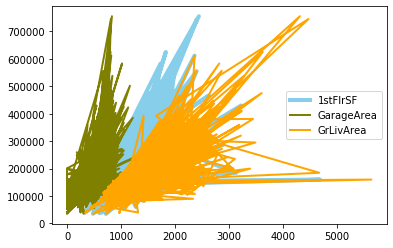

In [9]:
#Visualizing the linear relationship between the response variable and other columns

plt.plot( '1stFlrSF', 'SalePrice', data=train, marker='', color='skyblue', linewidth=4, label="1stFlrSF")
plt.plot( 'GarageArea', 'SalePrice', data=train, marker='', color='olive', linewidth=2, label="GarageArea")
plt.plot( 'GrLivArea', 'SalePrice', data=train, marker='', color='orange', linewidth=2, label="GrLivArea")
plt.legend()


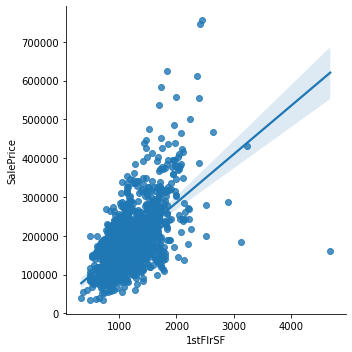

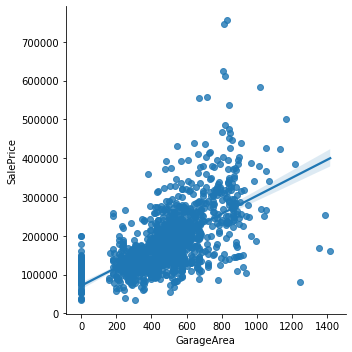

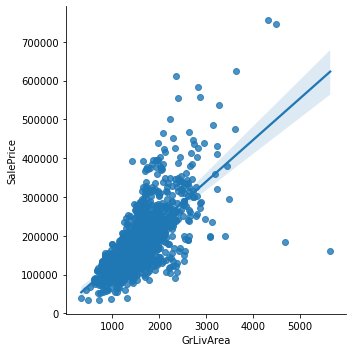

In [10]:
#Sales price and the below mentioned three features have a strong positive relation

sns.lmplot(x='1stFlrSF',y='SalePrice',data=train,)
sns.lmplot(x='GarageArea',y='SalePrice',data=train)
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


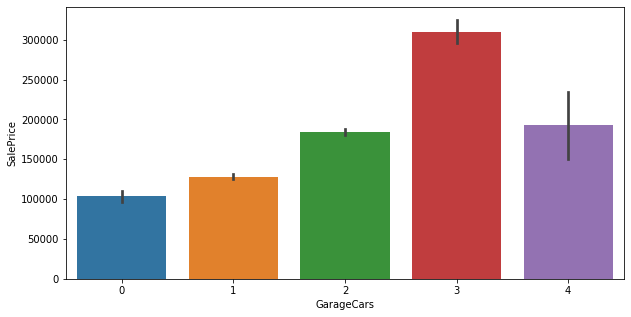

In [11]:
#Visualizing the number of fullbaths for different sales price 

print(train['GarageCars'].value_counts())

plt.figure(figsize=(10,5))
sns.barplot(x='GarageCars',y = 'SalePrice',data=train)
plt.show()

### Imputing the missing data with the mean values

In [12]:
#Find the missing data in the train dataset and consider only those columns for which missing value count is less than 81

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

#train.isna().sum()

In [13]:
#Replace the missing value with the mean value

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train.isnull().sum().sort_values(ascending=False).head(5)

SalePrice       0
OpenPorchSF     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
dtype: int64

In [14]:
#Find the missing data in the test dataset and consider only those columns for which 
#missing value count is less than 78
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])

test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

#test.isna().sum()

In [15]:
#Replace the missing value with the mean value

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test.isnull().sum().sort_values(ascending=False).head(5)

OpenPorchSF     0
2ndFlrSF        0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
dtype: int64

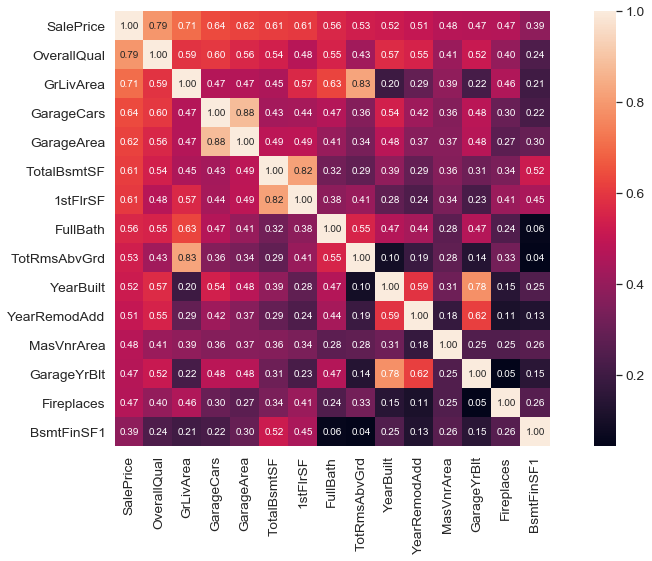

In [16]:
#saleprice correlation heatmap for the selected features
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Creating new Features:

In the below code, 7 new features are been created:

▪︎ TotalSF : Total square feet area which is the sum of square feet areas of the basement, firstfloor and second floor

▪︎ Total_floors : The total number of floors in the house that is sum of first floors and second floors.

▪︎ Has_garage : If the "GarageArea" column is greater than 1 set the value of new col as 1 else 0.

▪︎ Has_bsmt : If the "TotalBsmtSF" column is greater than 1 set the value of new col as 1 else 0.

▪︎ has_fire_place : If the "Fireplaces" column is greater than 1 set the value of new col as 1 else 0.

▪︎ Total_porch_sf : Total porch square feet area which is the sum of square feet areas of the OpenPorchSF and WoodDeckSF.

▪︎ YearsSinceRemodel : This feature gives the number of years the house has been remodelled from the time it was first built.



In [17]:
#For train dataset:

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['total_floors'] = train['2ndFlrSF'] + train['1stFlrSF']
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['GarageCars'] = train['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train['Total_porch_sf'] = (train['OpenPorchSF'] + train['WoodDeckSF'])
train['YearsSinceRemodel'] = train['YearRemodAdd'].astype(int) - train['YearBuilt'].astype(int)

train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,WoodDeckSF,OpenPorchSF,SalePrice,TotalSF,total_floors,hasgarage,hasbsmt,hasfireplace,Total_porch_sf,YearsSinceRemodel
0,7,2003,2003,196.0,706,856,856,854,1710,2,...,0,61,208500,2566,1710,1,1,0,61,0
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,...,298,0,181500,2524,1262,1,1,1,298,0
2,7,2001,2002,162.0,486,920,920,866,1786,2,...,0,42,223500,2706,1786,1,1,1,42,1
3,7,1915,1970,0.0,216,756,961,756,1717,1,...,0,35,140000,2473,1717,1,1,1,35,55
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,...,192,84,250000,3343,2198,1,1,1,276,0


In [18]:
#Drop those columns which are already been used in the feature creation in train dataset

train = train.drop(['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF', 
                    'GarageCars', 'GarageArea','Fireplaces','OpenPorchSF','WoodDeckSF'], axis=1)

In [19]:
train = train[['OverallQual','MasVnrArea','BsmtFinSF1','GrLivArea','FullBath','TotRmsAbvGrd','GarageYrBlt',
              'TotalSF','total_floors','hasgarage','hasbsmt','hasfireplace','SalePrice']]

In [20]:
#For test dataset

test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF']
test['total_floors'] = test['2ndFlrSF'] + test['1stFlrSF']
test['hasgarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['hasbsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['GarageCars'] = test['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
test['hasfireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test['Total_porch_sf'] = (test['OpenPorchSF'] + test['WoodDeckSF'])
test['YearsSinceRemodel'] = test['YearRemodAdd'].astype(int) - test['YearBuilt'].astype(int)

In [21]:
#Drop those columns which are already been used in the feature creation in test dataset

test = test.drop(['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF', 
                    'GarageCars', 'GarageArea','Fireplaces','OpenPorchSF','WoodDeckSF'], axis=1)


In [22]:
test = test[['OverallQual','MasVnrArea','BsmtFinSF1','GrLivArea','FullBath','TotRmsAbvGrd','GarageYrBlt',
              'TotalSF','total_floors','hasgarage','hasbsmt','hasfireplace']]

## Feature importance: 

In the code below ExtraTreesClassifier classifier is used to estimate the importance of features 

In [23]:
array = train.values
X = array[:,0:12]
Y = array[:,11]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.02800709 0.00893293 0.00584941 0.01357619 0.01009282 0.00818857
 0.00451825 0.03707982 0.0305656  0.00681442 0.00173693 0.84463798]


In [24]:
## From train divide into 70% 30% train and test respectively

X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], 
                                                    test_size=0.3, random_state=101)

### Scaling and Transformation

In [25]:
# Scaling and Transformation

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)


sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

## Linear Regression Model :

In [26]:
#instantiate model
regressor = LinearRegression()

#fit the model to data
regressor.fit(X_train,y_train)

print(regressor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


[-5.72213489e-16]
[[ 0.35997416  0.05698413  0.14815644 -0.20582873 -0.03806716  0.02654032
   0.13641742  0.34951892  0.31639697  0.03252929 -0.06365562  0.02764483]]


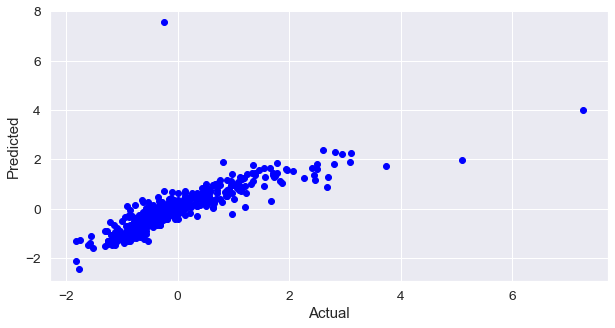

In [27]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

#predict on new data
predictions = regressor.predict(X_test)
predictions= predictions.reshape(-1,1)

#plot the actual and predicted scatter plot
plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions, color = 'blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [28]:
#Evalutaion of the metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared Error:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 0.3015116904689828
Mean Squared Error: 0.32884197887533323
Root Mean Squared Error: 0.5734474508403827
R-squared Error: 0.6711580211246668


### Conclusion: About 67% of variance in the salesprice is explained by the model.

### Running the trained model on test dataset to predict the saleprice

In [29]:
#read the test.csv file
t1 = pd.read_csv('test.csv')
test_id = t1['Id']
t1 = pd.DataFrame(test_id, columns=['Id'])

In [30]:
#Scale and transform
test = sc_X.fit_transform(test)
test.shape

(1459, 12)

In [31]:
#initiate the model and predict on test data
test_prediction=regressor.predict(test)
test_prediction= test_prediction.reshape(-1,1)


In [32]:
#Predicting the salesprice 
test_prediction =sc_y.inverse_transform(test_prediction)
test_prediction = pd.DataFrame(test_prediction, columns=['SalePrice'])

test_pred = pd.concat([test_id,test_prediction], axis=1)
test_pred.head()

,Id,SalePrice
0,1461,122405.887956
1,1462,195495.273877
2,1463,162231.629057
3,1464,178967.019212
4,1465,218612.893018


## Decision Tree Regression Model:

In [33]:
#instantiate model
tree_reg = DecisionTreeRegressor(random_state = 100)
#fit the model
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [34]:
#Predict on new data
tree_pred = tree_reg.predict(X_test)
tree_pred= tree_pred.reshape(-1,1)

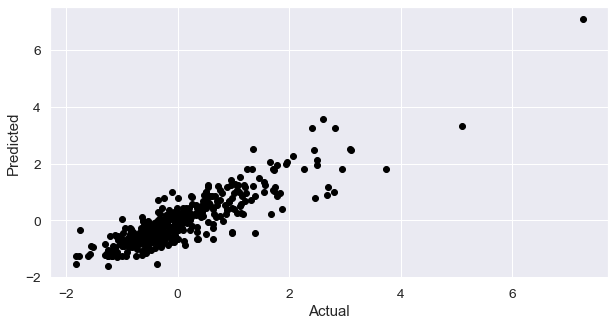

In [35]:
#plot the actual and predicted scatter plot
plt.figure(figsize=(10,5))
plt.scatter(y_test,tree_pred, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [36]:
#Evalutaion of the metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))
print('R-squared Error:', metrics.r2_score(y_test, tree_pred))

Mean Absolute Error: 0.3229098554589371
Mean Squared Error: 0.21384900924260639
Root Mean Squared Error: 0.4624381139597021
R-squared Error: 0.7861509907573936


### Conclusion: About 78% of variance in the salesprice is explained by the model.

### Running the trained model on test dataset to predict the saleprice

In [37]:
#read the test.csv file
t2 = pd.read_csv('test.csv')
test_id1 = t2['Id']
t2 = pd.DataFrame(test_id1, columns=['Id'])
#Scale and transform
test1 = sc_X.fit_transform(test)
test.shape
#initiate the model and predict on test data
tree_prediction=tree_reg.predict(test)
tree_prediction= tree_prediction.reshape(-1,1)
#Predicting the salesprice 
tree_prediction =sc_y.inverse_transform(tree_prediction)
tree_prediction = pd.DataFrame(tree_prediction, columns=['SalePrice'])

tree_pred = pd.concat([test_id1,tree_prediction], axis=1)
tree_pred.head()

,Id,SalePrice
0,1461,124788.170643
1,1462,154744.497598
2,1463,124788.170643
3,1464,173716.838002
4,1465,189693.545711


## Support Vector Machine Regression

In [38]:
##instantiate model
svmr = SVR(kernel = 'rbf')

#fit the model
svmr.fit(X_train, y_train)

#predict on new data
svmr_pred = svmr.predict(X_test)
svmr_pred= svmr_pred.reshape(-1,1)

/Users/rutujatikare/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


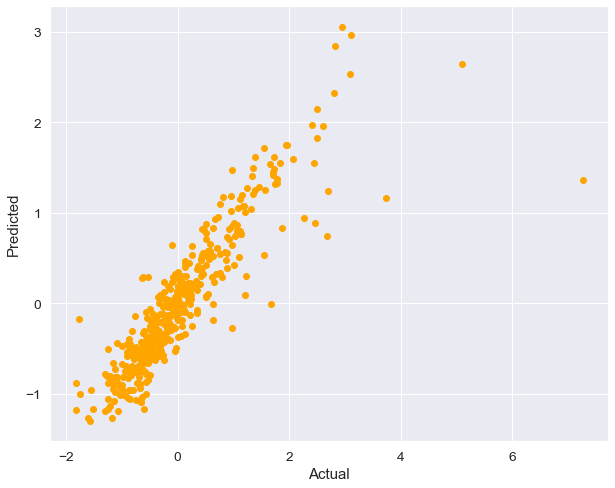

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,svmr_pred, c='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [40]:
#Evalutaion of the metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svmr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svmr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svmr_pred)))
print('R-squared Error:', metrics.r2_score(y_test, svmr_pred))

Mean Absolute Error: 0.26285490817116636
Mean Squared Error: 0.22890542294492164
Root Mean Squared Error: 0.4784406159022472
R-squared Error: 0.7710945770550783


### Conclusion: About 77% of variance in the salesprice is explained by the model.

### Running the trained model on test dataset to predict the saleprice

In [41]:
#read the test.csv file
t3 = pd.read_csv('test.csv')
test_id2 = t3['Id']
t3 = pd.DataFrame(test_id2, columns=['Id'])
#Scale and transform
test = sc_X.fit_transform(test)
test.shape
#initiate the model and predict on test data
svm_prediction=svmr.predict(test)
svm_prediction= svm_prediction.reshape(-1,1)
#Predicting the salesprice 
svm_prediction =sc_y.inverse_transform(svm_prediction)
svm_prediction = pd.DataFrame(svm_prediction, columns=['SalePrice'])

svm_pred = pd.concat([test_id2,svm_prediction], axis=1)
svm_pred.head()

,Id,SalePrice
0,1461,134161.788787
1,1462,168836.771831
2,1463,174941.103726
3,1464,183104.396267
4,1465,196913.119872


### Conclusion: Decision tree regression and Support vector machine Regression models did a pretty good job in predicting the housing prices.